In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Descrição do DataSet

Utilizaremos a base de dados **sales.csv** já tratada que possui 17.800 linhas de dados históricos sobre compras de clientes em lojas fictícias considerando certos anos passsados. A escolha do dataset se deu em função da presença de features que são muito importantes e fundamentais para gerar insights acerca do ramo das vendas, tais como: tipo de veículo de compra, receita, receita planejada, lucro bruto, entre outros. 

O cabeçalho do dataset é mostrado logo abaixo.

In [ ]:
dfsales = pd.read_csv("dados/sales.csv")
dfsales.head()

,Year,Product line,Product type,Product,Order method type,Retailer country,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
0,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,5819.70,6586.16,1733.2,619.0,2.8,10.64,4086.50,5.105
1,2004,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,10904.28,11363.52,2990.4,1068.0,2.8,10.64,7913.88,10.210
3,2005,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United Kingdom,27987.84,28855.68,7593.6,2712.0,2.8,10.64,20394.24,10.320
4,2006,Golf Equipment,Golf Accessories,Course Pro Golf and Tee Set,Sales visit,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


De início, vamos obter alguns dados estatísticos, como percentil, média e desvio padrão, referentes às colunas numéricas

In [ ]:
dfsales.describe()

,Year,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
count,17823.000000,6.045000e+03,6.045000e+03,6.045000e+03,5860.000000,6045.000000,6045.000000,6.045000e+03,6045.000000
mean,2005.164955,1.038455e+05,1.058923e+05,5.701932e+04,4691.273549,58.882618,48.900855,4.336203e+04,44.795072
std,0.956260,1.836042e+05,1.881274e+05,1.117846e+05,8950.955313,348.369401,62.814500,7.185831e+04,58.399255
min,2004.000000,0.000000e+00,0.000000e+00,3.360000e+01,5.000000,0.850000,3.660000,-1.336560e+04,0.000000
25%,2004.000000,1.364924e+04,1.383736e+04,5.759760e+03,625.000000,2.760000,7.000000,7.009650e+03,6.580000
50%,2005.000000,4.154119e+04,4.189571e+04,1.906720e+04,1695.000000,9.000000,18.000000,1.894653e+04,17.650000
75%,2006.000000,1.120026e+05,1.144758e+05,5.796000e+04,4858.000000,34.970000,66.770000,5.002308e+04,62.760000
max,2007.000000,3.644349e+06,3.477910e+06,2.061750e+06,164142.000000,7833.000000,265.140000,1.416160e+06,265.140000


Agora, agruparemos algumas colunas por ano para ter uma ideia de escala relativa através de boxplots para os anos de 2004 a 2007, de forma sequencial

Year
2004    AxesSubplot(0.125,0.11;0.775x0.77)
2005    AxesSubplot(0.125,0.11;0.775x0.77)
2006    AxesSubplot(0.125,0.11;0.775x0.77)
2007    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

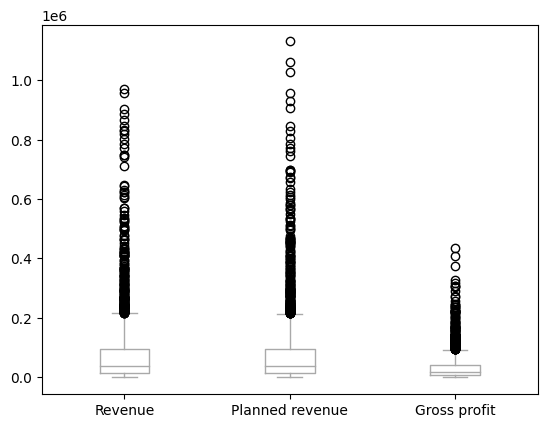

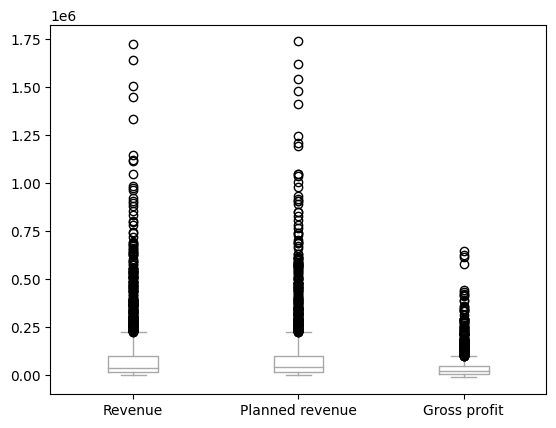

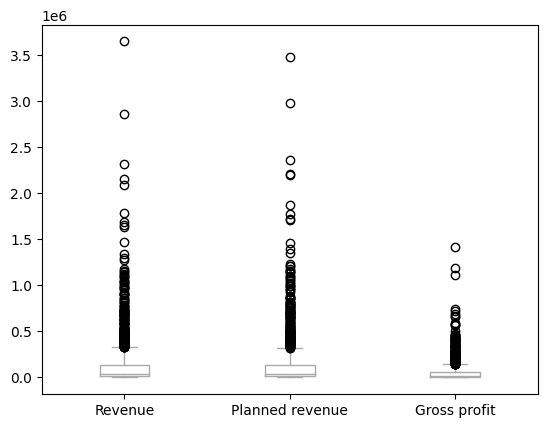

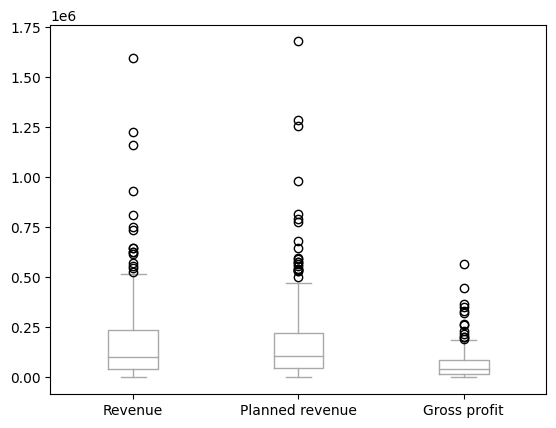

In [ ]:
dfsales.groupby('Year')[['Revenue', 'Planned revenue', 'Gross profit']].plot(kind= 'box', color='darkgray')

A partir dos boxplots acima, podemos visualizar que a receita e receita planejada possuem uma mediana mais alta do que o lucro bruto.

Vamos ter um retorno em dólares do total da receita planejada considerando cada país da base de dados

In [ ]:
dfsales.groupby('Retailer country')['Planned revenue'].sum()

Retailer country
Australia         1.552855e+07
Austria           1.663918e+07
Belgium           1.434713e+07
Brazil            1.718625e+07
Canada            3.975547e+07
China             4.432347e+07
Denmark           8.657223e+06
Finland           2.768705e+07
France            3.640336e+07
Germany           3.565769e+07
Italy             2.649849e+07
Japan             4.691096e+07
Korea             3.226426e+07
Mexico            2.720830e+07
Netherlands       2.554392e+07
Singapore         2.945750e+07
Spain             2.415171e+07
Sweden            9.804136e+06
Switzerland       1.079256e+07
United Kingdom    4.081019e+07
United States     1.104916e+08
Name: Planned revenue, dtype: float64

Podemos notar que o país que teve maior receita planejada somada foi o Estados Unidos, seguido por Reino Unido, Japão e China. Nos demais países, a soma da receita planejada se mostrou bem similar.

Vamos ter um retorno dos valores de lucro bruto, em dólares, mais presentes na base de dados

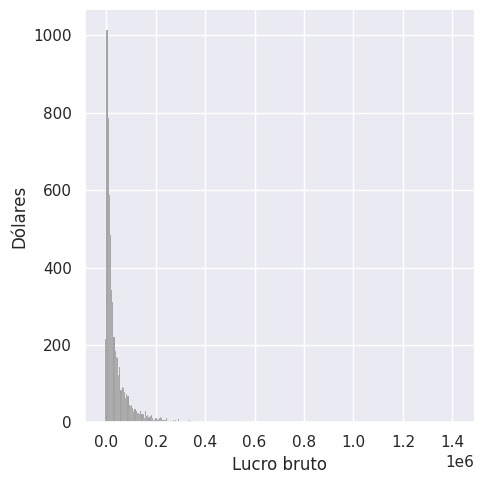

In [ ]:
ax = sns.displot(dfsales['Gross profit'].dropna(), color='gray')
ax.set(xlabel = "Lucro bruto", ylabel = "Dólares")

Podemos inferir que o lucro bruto ficou na faixa dos $1.000 na maior parte dos registros.

Agora iremos visualizar o total de receita, custo, quantidades vendidas e lucro bruto em cada país nos anos de 2004 a 2007 

In [ ]:
dfsales.groupby('Retailer country')[['Revenue', 'Planned revenue', 'Product cost', 'Quantity', 'Gross profit']].sum()

,Revenue,Planned revenue,Product cost,Quantity,Gross profit
Retailer country,,,,,
Australia,1.526422e+07,1.552855e+07,8367046.10,649467.0,6384806.59
Austria,1.631419e+07,1.663918e+07,8923176.61,719084.0,6871597.34
Belgium,1.415299e+07,1.434713e+07,7695759.79,622150.0,5964513.37
Brazil,1.686686e+07,1.718625e+07,9210809.34,744353.0,7092849.29
Canada,3.918371e+07,3.975547e+07,21435997.54,1701123.0,16670505.63
China,4.350234e+07,4.432347e+07,23925152.71,1935454.0,18003637.37
Denmark,8.455457e+06,8.657223e+06,4695594.80,368479.0,3496915.24
Finland,2.714528e+07,2.768705e+07,14879340.33,1207265.0,11335187.27
France,3.595367e+07,3.640336e+07,19646425.37,1620252.0,14968952.89


Podemos inferir que a Dinamarca teve a menor receita e os EUA a maior dentre esse período de quatro anos. A maioria dos países geraram receita na casa dos 20,000,000 USD e quase alcançaram as suas metas.

Agora vamos descobrir o país cujo desempenho em relação ao produto foi afetado da pior maneira quando as vendas caíram

In [ ]:
dfsales.dropna().groupby('Retailer country')[['Revenue', 'Planned revenue','Product cost', 'Quantity', 'Unit cost','Unit price', 'Gross profit', 'Unit sale price']].min()

,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
Retailer country,,,,,,,,
Australia,0.0,294.00,120.78,49.0,0.85,3.66,-558.00,0.000000
Austria,0.0,0.00,33.60,5.0,0.85,3.66,-360.00,0.000000
Belgium,0.0,0.00,70.18,6.0,0.85,3.66,-280.72,0.000000
Brazil,966.0,966.00,455.63,138.0,0.85,3.66,510.37,3.192857
Canada,198.0,198.00,93.39,33.0,0.85,3.66,53.40,2.875000
China,0.0,618.00,291.49,103.0,0.85,3.66,-840.00,0.000000
Denmark,0.0,738.00,312.96,40.0,0.85,3.66,-2561.74,0.000000
Finland,486.0,486.00,223.56,81.0,0.85,3.66,262.44,3.141429
France,0.0,230.12,90.24,43.0,0.85,3.66,-190.40,0.000000


Como a maioria dos valores na coluna de lucro bruto é negativa, é possível inferir que quase todos os produtos em algum momento deram prejuízo nos mercados-alvo. Brasil, Espanha, Finlândia e Canadá são algumas exceções.

Vamos ter um insight acerca dos atributos considerando cada ano do dataset

In [ ]:
dfsales.groupby('Year')[['Revenue', 'Planned revenue', 'Product cost', 'Quantity', 'Unit cost', 'Unit price', 'Gross profit', 'Unit sale price']].sum()

,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
Year,,,,,,,,
2004,1.528977e+08,1.567331e+08,8.538058e+07,7318558.0,97750.174438,92781.46,62482134.57,84841.786496
2005,1.908502e+08,1.947044e+08,1.029861e+08,8453776.0,113381.098628,103147.42,81126260.32,93071.003707
2006,2.228721e+08,2.270020e+08,1.209524e+08,8786835.0,134772.241249,82126.84,95563977.64,76786.074337
2007,6.112591e+07,6.167953e+07,3.536268e+07,2931694.0,10041.912620,17549.95,22951118.87,16087.343791


<AxesSubplot: xlabel='Year'>

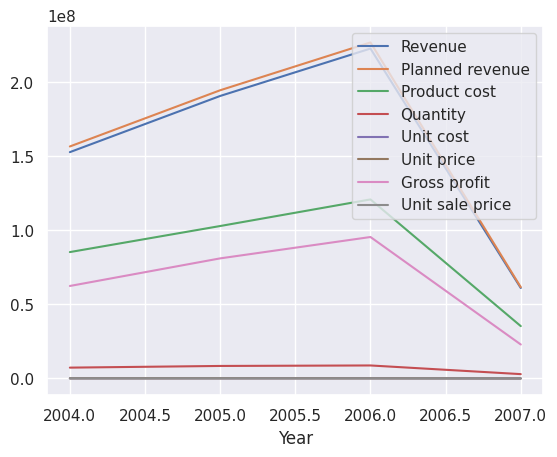

In [ ]:
dfsales.groupby('Year')[['Revenue', 'Planned revenue', 'Product cost', 'Quantity', 'Unit cost', 'Unit price', 'Gross profit', 'Unit sale price']].sum().plot()

Podemos ver que receita, receita planejada, lucro bruto e custo do produto caíram bruscamente no ano de 2007.

Qual categoria de equipamento contribuiu mais para a receita geral da empresa? 

In [ ]:
dfsales.groupby('Product line')[['Revenue', 'Planned revenue', 'Product cost', 'Quantity', 'Unit cost', 'Unit price', 'Gross profit', 'Unit sale price']].sum()

,Revenue,Planned revenue,Product cost,Quantity,Unit cost,Unit price,Gross profit,Unit sale price
Product line,,,,,,,,
Camping Equipment,4.860065e+08,4.966410e+08,2.862390e+08,15200145.0,323199.354903,214876.61,1.825174e+08,195361.436414
Golf Equipment,4.205702e+07,4.235803e+07,1.525444e+07,2367637.0,14195.740000,39488.03,2.483757e+07,36115.529168
Mountaineering Equipment,5.254793e+07,5.293751e+07,2.522232e+07,3672582.0,11540.322032,24108.88,2.639106e+07,23103.209617
Outdoor Protection,4.713449e+07,4.818252e+07,1.796598e+07,6250499.0,7010.010000,17132.15,2.837751e+07,16206.033132


array([<AxesSubplot: title={'center': 'Gross profit'}, ylabel='Product line'>,
       <AxesSubplot: title={'center': 'Quantity'}, ylabel='Product line'>],
      dtype=object)

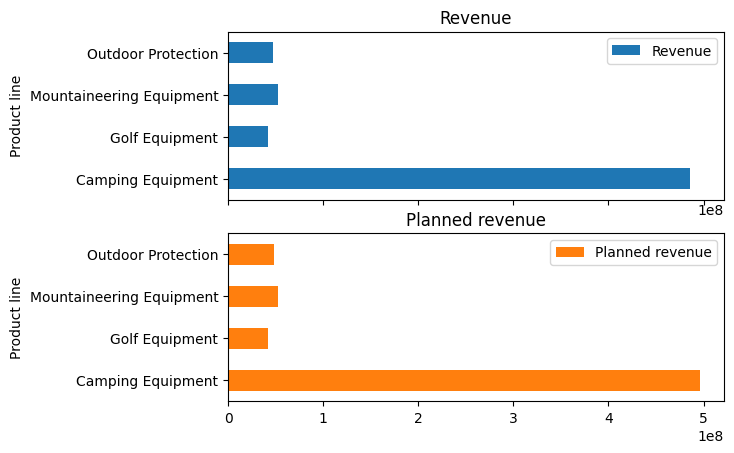

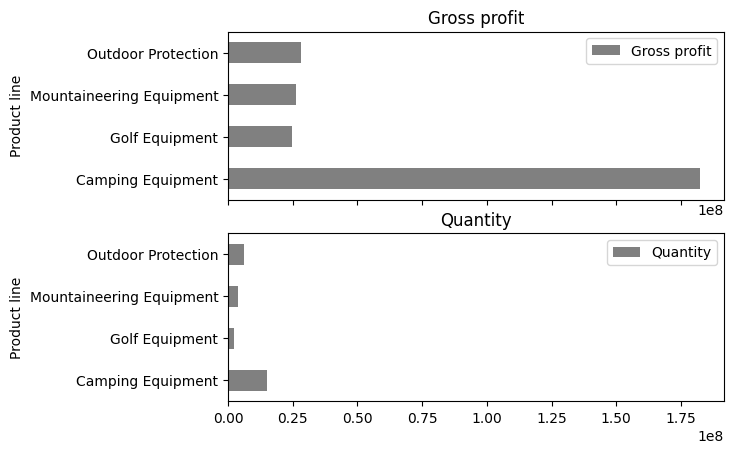

In [ ]:
dfsales.groupby('Product line')[['Revenue', 'Planned revenue']].sum().plot(kind='barh', subplots=True)
dfsales.groupby('Product line')[[ 'Gross profit', 'Quantity']].sum().plot(kind='barh', subplots=True, color='gray')

Como mostram os gráficos anteriores, os equipamentos de camping se figuraram mais influentes na contribuição geral da receita e no lucro bruto.

Qual foi o veículo de compra mais utilizado pelos clientes?

In [ ]:
dfsales.groupby('Order method type')[['Revenue', 'Planned revenue','Product cost','Quantity','Gross profit']].sum()

,Revenue,Planned revenue,Product cost,Quantity,Gross profit
Order method type,,,,,
E-mail,3.238293e+07,3.301196e+07,1.768881e+07,1503654.0,1.352462e+07
Fax,1.376507e+07,1.399805e+07,7.399451e+06,653190.0,5.993243e+06
Mail,9.749679e+06,9.942812e+06,5.211545e+06,483151.0,4.175907e+06
Sales visit,6.946909e+07,7.141927e+07,3.870416e+07,3084491.0,2.890578e+07
Special,6.642340e+06,6.618693e+06,3.550795e+06,324760.0,2.824776e+06
Telephone,7.056328e+07,7.230265e+07,3.889483e+07,3200421.0,2.907046e+07
Web,4.251736e+08,4.328256e+08,2.332322e+08,18241196.0,1.776287e+08


array([<AxesSubplot: title={'center': 'Quantity'}, xlabel='Order method type'>,
       <AxesSubplot: title={'center': 'Gross profit'}, xlabel='Order method type'>],
      dtype=object)

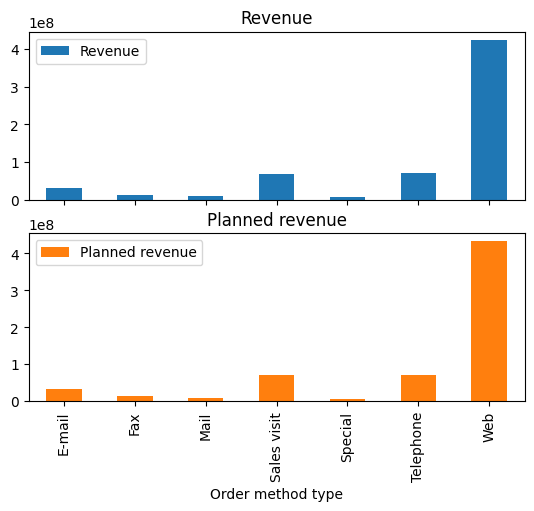

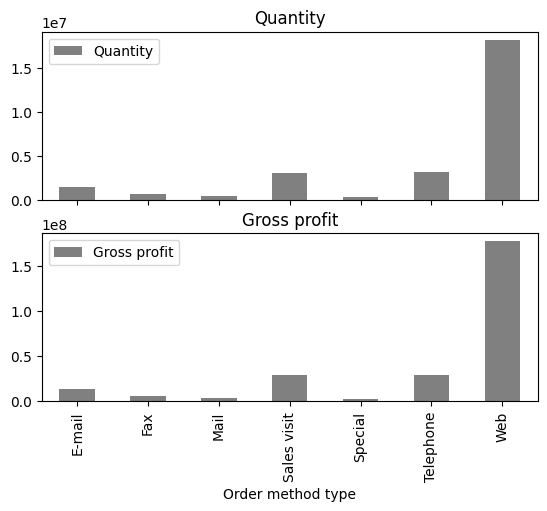

In [ ]:
dfsales.groupby('Order method type')[['Revenue', 'Planned revenue']].sum().plot(kind='bar', subplots=True)
dfsales.groupby('Order method type')[['Quantity', 'Gross profit']].sum().plot(kind='bar', subplots=True, color='gray')

Observe que as maiores vendas foram geradas pela internet (mais do todos os outros veículos combinados).

Por fim, concluímos nossa análise de vendas. Geramos insights úteis e práticos com as informações fornecidas pela base de dados. 

À medida que trabalhamos com maiores datasets, com maiores quantidades de features, podemos obter insights mais aprofundados visando tomadas de decisão futuras no setor de marketing de uma empresa.